Here we make a Singular value Decompoition of the Participant Input-Output Matrix

In [7]:
import numpy as np
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib.pyplot import ylabel
from matplotlib.font_manager import FontProperties

get the dir

In [8]:
# the name of our directory
dname = os.path.dirname(os.getcwd()) + "/data_loading/data_v2_quotes/"
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

Load our matrices of performance per trial and per block

In [9]:
in_out_matrix = np.load(dname + 'in_out_matrix.npy')
print(in_out_matrix.shape)

in_out_matrix_trialwise = np.load(dname + 'in_out_matrix_trialwise.npy')
print(in_out_matrix_trialwise.shape)


(7, 4, 8)
(7, 4, 128)


Perform the SVD

In [17]:
# u corresponds to left singular vectors, vt to right singular vectors, and s has singular values on the diagonal
test = in_out_matrix[:,:,4] - 3/7  # we substract 3/7 to remove chance performance
u, s, vt = np.linalg.svd(test, full_matrices=False)
s = np.diag(s)

# change the sign of singular vectors for comparability with saxe et al. 2019
# multiplication of an eigenvector with a scalar retains the eigenvector
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

print(in_out_matrix[:,:,7].shape)
print(u.shape, s.shape, vt.shape)
print(u)
print(s)

(7, 4)
(7, 4) (4, 4) (4, 4)
[[ 0.8382099   0.09576042 -0.00958379  0.00713834]
 [ 0.03822044  0.55995226 -0.01565664 -0.00973818]
 [ 0.15615631 -0.56718713 -0.05669609 -0.00935753]
 [-0.26131099  0.26618431  0.71642147  0.06198109]
 [-0.31442857  0.28363399 -0.68532253 -0.09297779]
 [-0.23367568 -0.30276443 -0.05277854  0.72374394]
 [-0.22317141 -0.33557942  0.10361611 -0.68078986]]
[[1.20139467 0.         0.         0.        ]
 [0.         0.91348803 0.         0.        ]
 [0.         0.         0.54595159 0.        ]
 [0.         0.         0.         0.46076871]]


Make some code to plot our matrices

C:\Users\Jirko\AppData\Local\Temp\ipykernel_7716\1060781414.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1,2,3,4], fontsize=15)


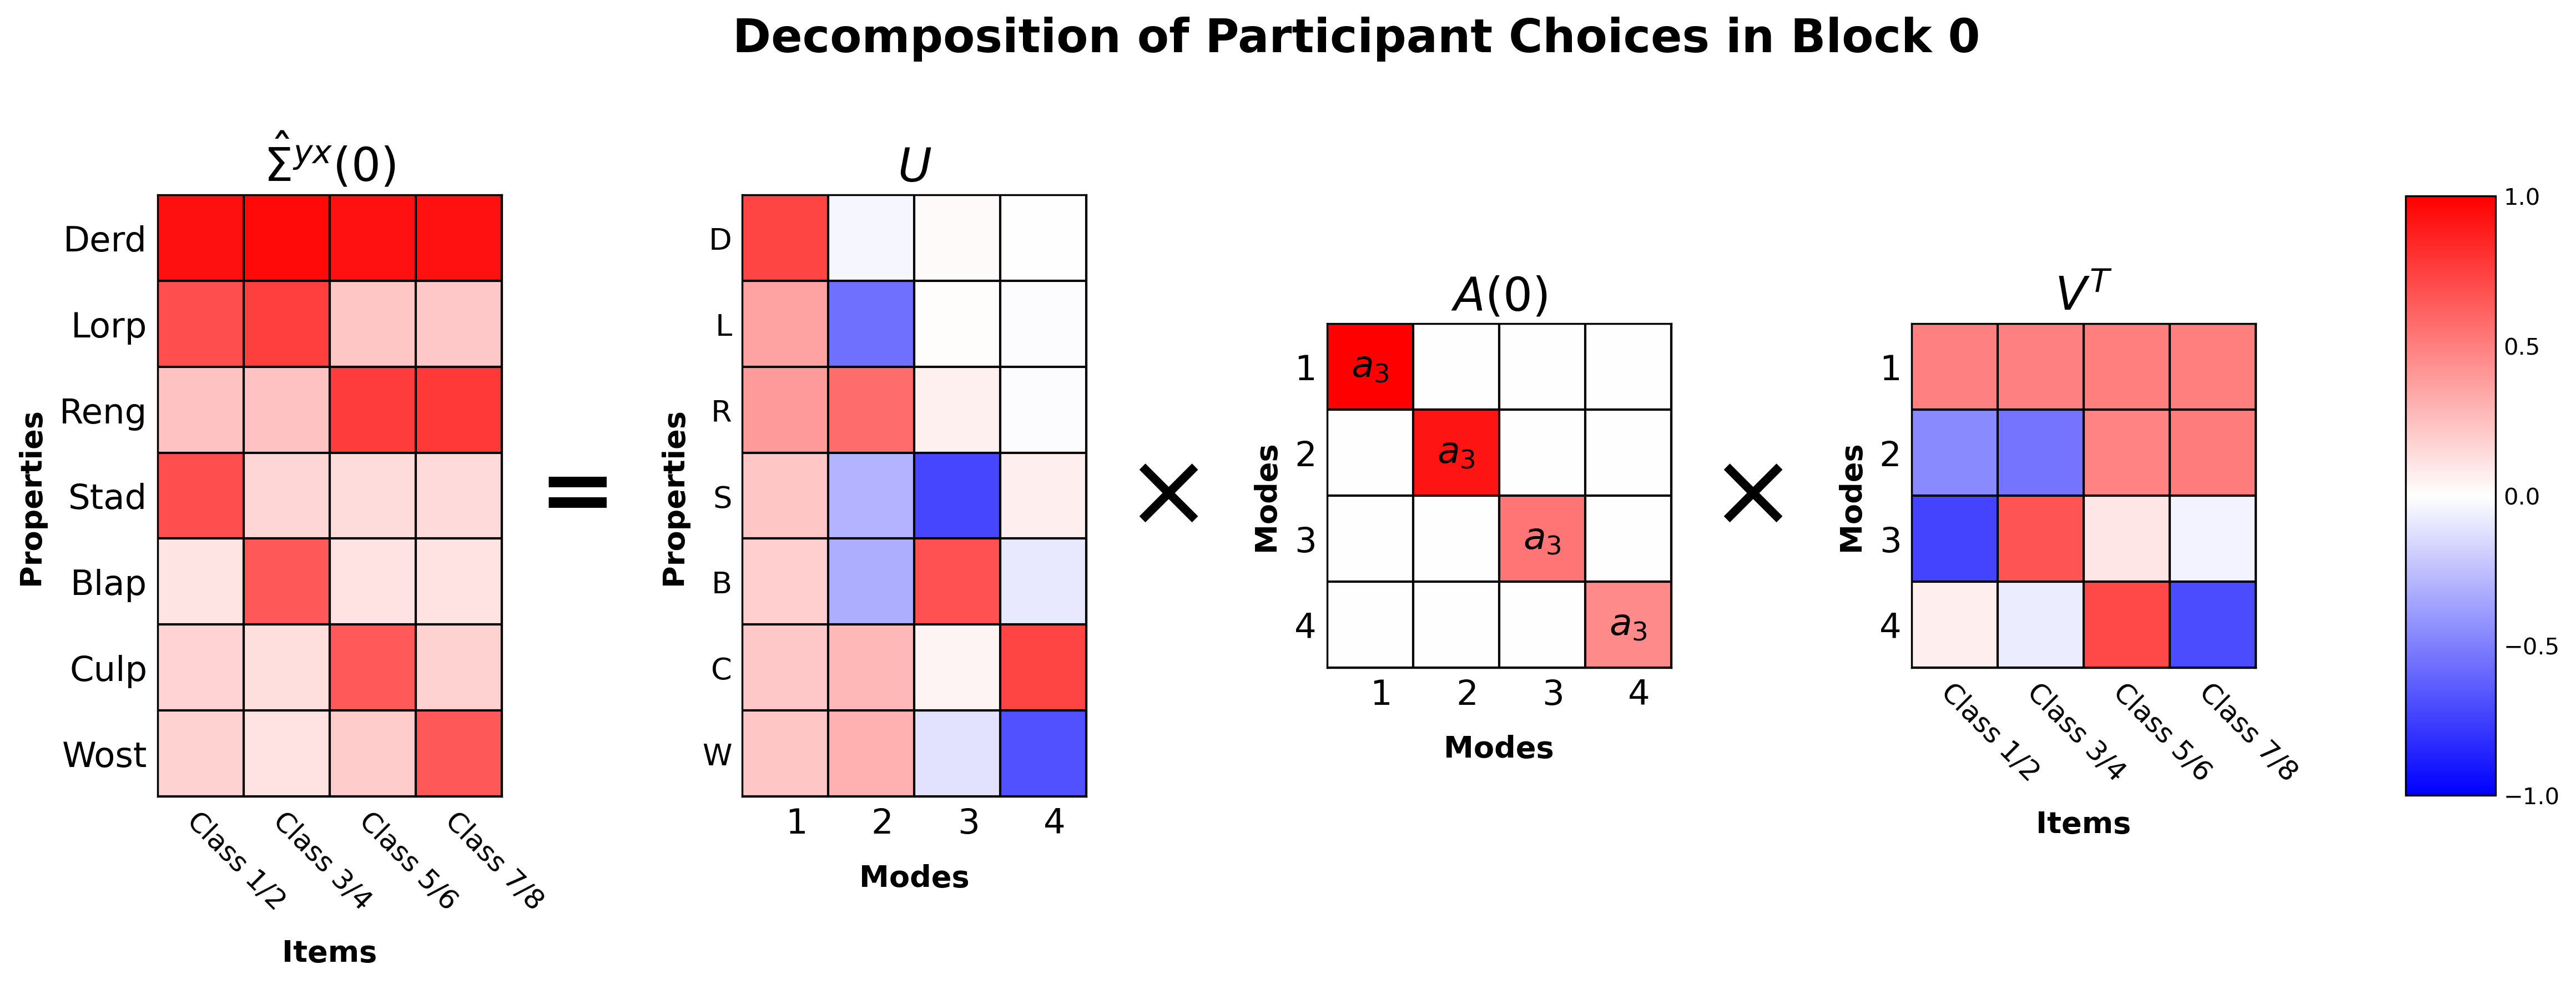

In [16]:
# custom function for the cmap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_SVD(u, s, vt, in_out_matrix, fig_name, fig_title, Block):
    """ a function to plot the input output matrix"""

    # Define figure
    fig, axes = plt.subplots(1, 4, figsize=(18, 6), dpi=300, facecolor='w')
    cmap = plt.get_cmap('bwr')

    # list of input, singular vectors and singular values for looping
    matrices = [in_out_matrix, u, s, vt]

    # Average per bloc
    for i, ax in enumerate(axes.flatten()):
        im = ax.matshow(matrices[i], cmap=cmap, vmin = -1, vmax = 1)

    # remove the ticks and make tick labels
    y_tick_labels_1 = ['Derd','Lorp','Reng','Stad', 'Blap', 'Culp', 'Wost']
    y_tick_labels_2 = ['D', 'L', 'R', 'S', 'B', 'C', 'W']
    x_tick_labels = ['Class 1/2', 'Class 3/4', 'Class 5/6', 'Class 7/8']

    # the titles 
    titles = ['$\hat{\Sigma}^{yx}(%s)$' % str(Block), '$U$', '$A(%s)$' % str(Block), '$V^{T}$']

    for i, ax in enumerate(axes.flatten()):
        
        sub_title = ax.set_title(titles[i], fontsize = 20)
        ax.tick_params(labeltop=False, labelbottom = True)

        if i in {0, 1}:

            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(y_tick_labels_1)), minor=True)

            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            ax.set_xticks(range(len(x_tick_labels)))

            # specific aspects of the two first axes 0 and 1
            if i == 0:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_1)))
                ax.set_yticklabels(y_tick_labels_1, fontsize=15)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")

                # y label is set
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)

            if i == 1:
                ax.set_ylabel("Properties",fontweight='bold', fontsize = 13, labelpad=6)
                ax.set_yticks(range(len(y_tick_labels_2)))
                ax.set_yticklabels(y_tick_labels_2, fontsize=13)
                ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
                # y label is set
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)


        if i in {2, 3}:
            # make grid
            ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            ax.set_yticks(np.arange(-.5, len(x_tick_labels)), minor=True)
            # Gridlines based on minor ticks
            ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

            # remove ticks
            ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)
            # set x and y and remove add tick labels
            ax.set_xticks(range(len(x_tick_labels)))
            ax.set_xticklabels([1,2,3,4], fontsize=15, ha="left", rotation_mode="anchor")
            ax.set_yticklabels([0,1,2,3,4], fontsize=15)

            # set the y label
            ax.set_ylabel("Modes",fontweight='bold', fontsize = 13, labelpad=6)

            # specific aspects of the two first axes 2 and 3
            if i == 2:
                # set the x label 
                ax.set_xlabel("Modes",fontweight='bold', fontsize = 13, labelpad=10)

                # a little loop which draws the labels of our singular values in our cells <3
                for j in range(4):
                    ax.text(j, j, '$a_%s$' % str(i+1), va='center', ha='center', fontsize = 16)

            if i == 3:
                ax.set_xlabel("Items",fontweight='bold', fontsize = 13, labelpad=10)
                ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=12, ha="left", rotation_mode="anchor")


    # add a supertitle
    fig.suptitle(fig_title, fontweight='bold', fontsize = 20)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.7, 
                        hspace=0.4)

    # add a colourbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks = [-1,-.5, 0, .5, 1])
    cbar.ax.tick_params(size=0)

    # add equal sign
    fig.text(0.24, 0.5, '=', fontsize=40, fontweight='bold', ha='center', va='center')
    fig.text(0.435, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')
    fig.text(0.63, 0.5, r'$\times$', fontsize=45, fontweight='bold', ha='center', va='center')

    #fig.savefig(fig_name)

# print(os.getcwd())
plot_SVD(u, s, vt, test, 
                  'figures/SVD_block_0.svg', 
                  "Decomposition of Participant Choices in Block 0",
                  0
                )

In [11]:
# testing if columns are othogonal
np.dot(u[:,0], u[:,2].T)

2.220446049250313e-16

In [ ]:
test = np.array([[1,1,1,1],[1,1,0,0], [0,0,1,1], [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

u, s, vt = np.linalg.svd(test, full_matrices=False)

# change the sign of singular vectors for comparability with saxe et al. 2019
# multiplication of an eigenvector with a scalar retains the eigenvector
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

s = np.diag(s)
np.set_printoptions(suppress=True)

plot_SVD(u, s, vt, test, 
                  'figure/in_out_matrix.svg', 
                  "Proportion of Participant Choices Across Blocks",
                  "Block",
                  1
                )

In [79]:
# restore the original matrix as a sanity check, indeed our SVD worked!
restored = np.dot(np.dot(u, s), vt)
restored
s

array([[2.64575131, 0.        , 0.        , 0.        ],
       [0.        , 1.73205081, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

This all seems to work now we will perform the SVD across trials and across blocks

In [84]:
# we check the dimensionality of our matrix and 
# subsequently bring them in form which allows for SVD in stacked mode 
print(in_out_matrix.shape)
print(in_out_matrix_trialwise.shape)
# wrong shape, lets resize
in_out_matrix_new = np.moveaxis(in_out_matrix, 2, 0) - 3/7 # again we substract chance performance
in_out_matrix_trialwise_new = np.moveaxis(in_out_matrix_trialwise, 2, 0) - 3/7 # again we substract chance performance

print(in_out_matrix_new.shape)
print(in_out_matrix_trialwise_new.shape)

(7, 4, 8)
(7, 4, 128)
(8, 7, 4)
(128, 7, 4)


This works! Now we decompose on these 3d tensors

In [89]:
u, s, vt = np.linalg.svd(in_out_matrix_new, full_matrices=False)
u.shape, s.shape, vt.shape

((8, 7, 4), (8, 4), (8, 4, 4))

Now we can plot the singular values

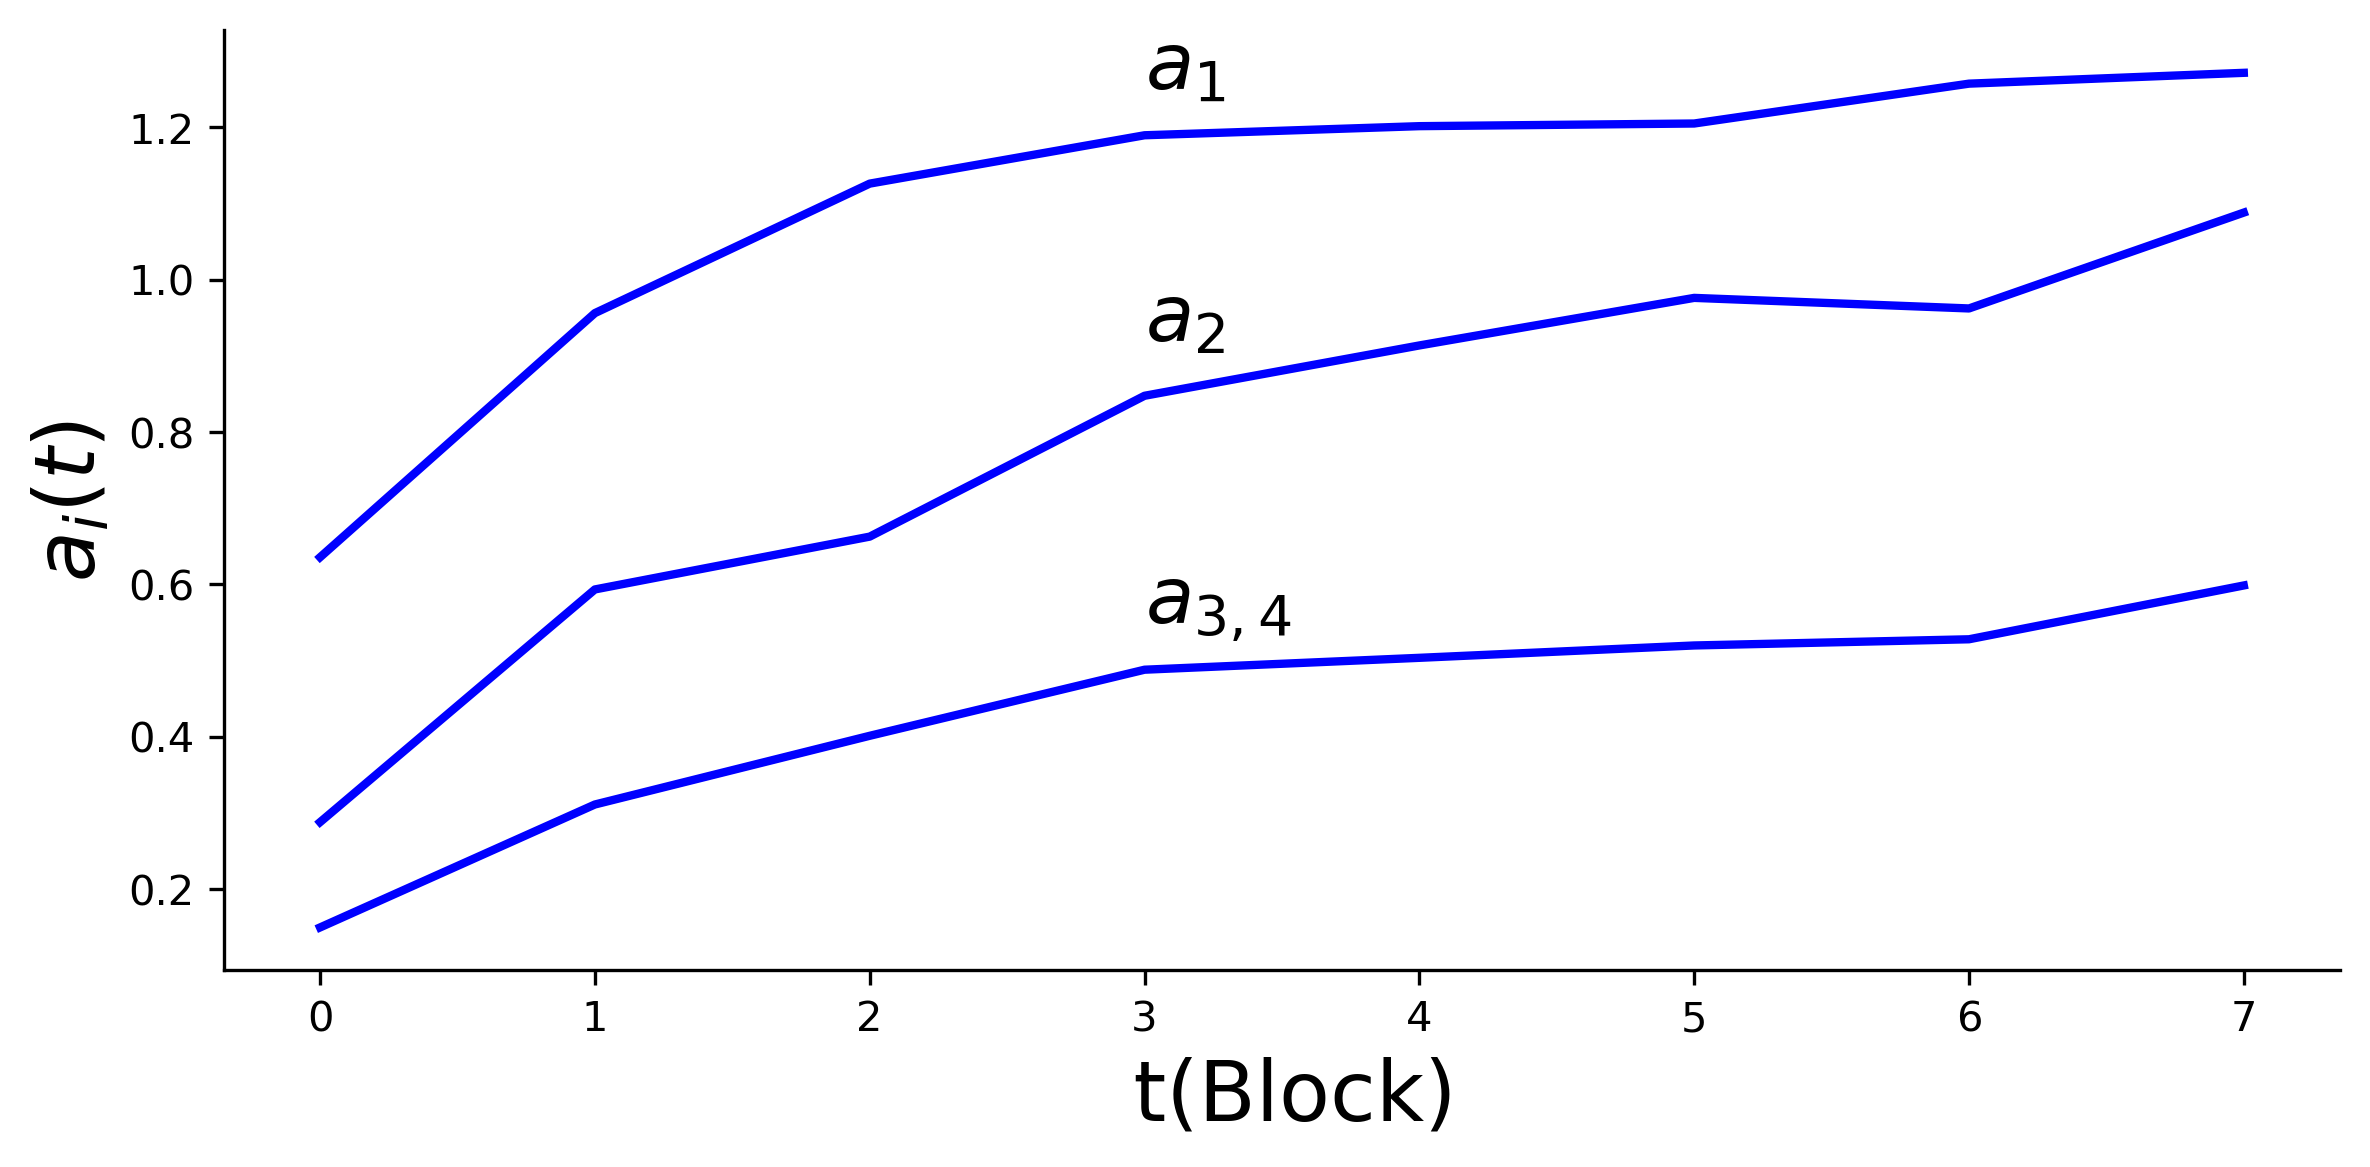

In [90]:
# lets create a function for plotting singular values

from turtle import color


def plot_singular_values(s, type, fig_name, locs=False):
    """a function to plot my singular values"""
    x_vals = np.arange(s.shape[0]) # lets get the x vals

    # make the annotation labels
    annos = ['$a_1$', '$a_2$', '$a_{3,4}$' ]

    # get the singular values in proper form
    s[:,2] = (s[:,2] + s[:,3])/2
    s_combined = np.delete(s,3,1)
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300, facecolor='w')
    for i in range(s_combined.shape[1]):
        ax.plot(x_vals, s_combined[:,i], color='blue', linewidth=2)
        if locs: 
            ax.text(locs[i][0],locs[i][1], annos[i], fontsize= 19)

    ax.set_xlabel(' t(%s)' %(type), fontsize= 20)
    ax.set_ylabel('$a_i(t)$', fontsize= 20)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    plt.tight_layout()
    fig.savefig(fig_name)
plot_singular_values(s, 'Block', 'figures/singular_values_blocks.svg', [(3,1.25), (3, 0.92), (3, 0.55)])

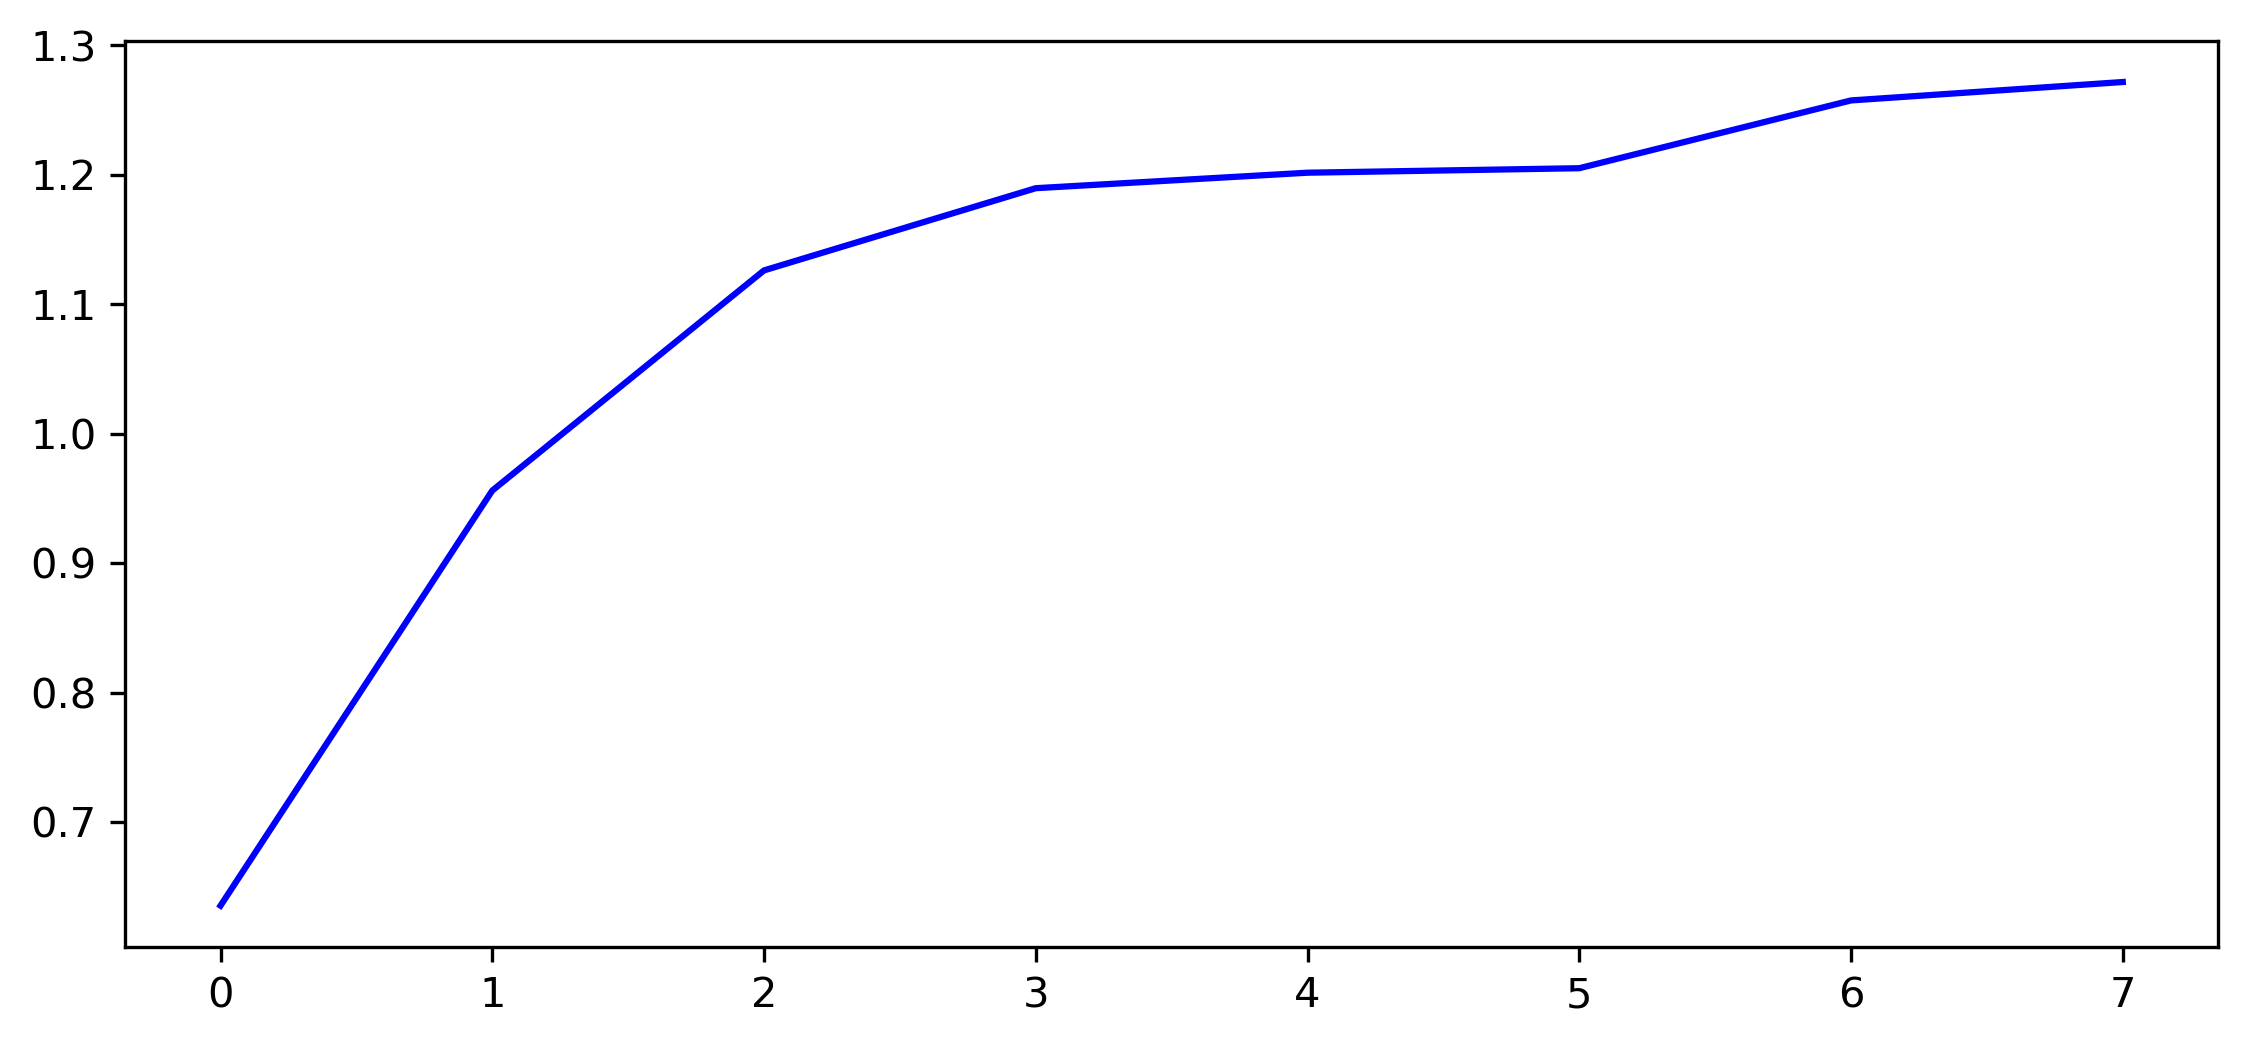

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')
x_vals = np.arange(s.shape[0])
ax.plot(x_vals,s[:,0], color = 'blue')

Well this looks quite odd, lets look at the trial-wise svd

In [93]:
u, s, vt = np.linalg.svd(in_out_matrix_trialwise_new, full_matrices=False)
u.shape, s.shape, vt.shape

((128, 7, 4), (128, 4), (128, 4, 4))

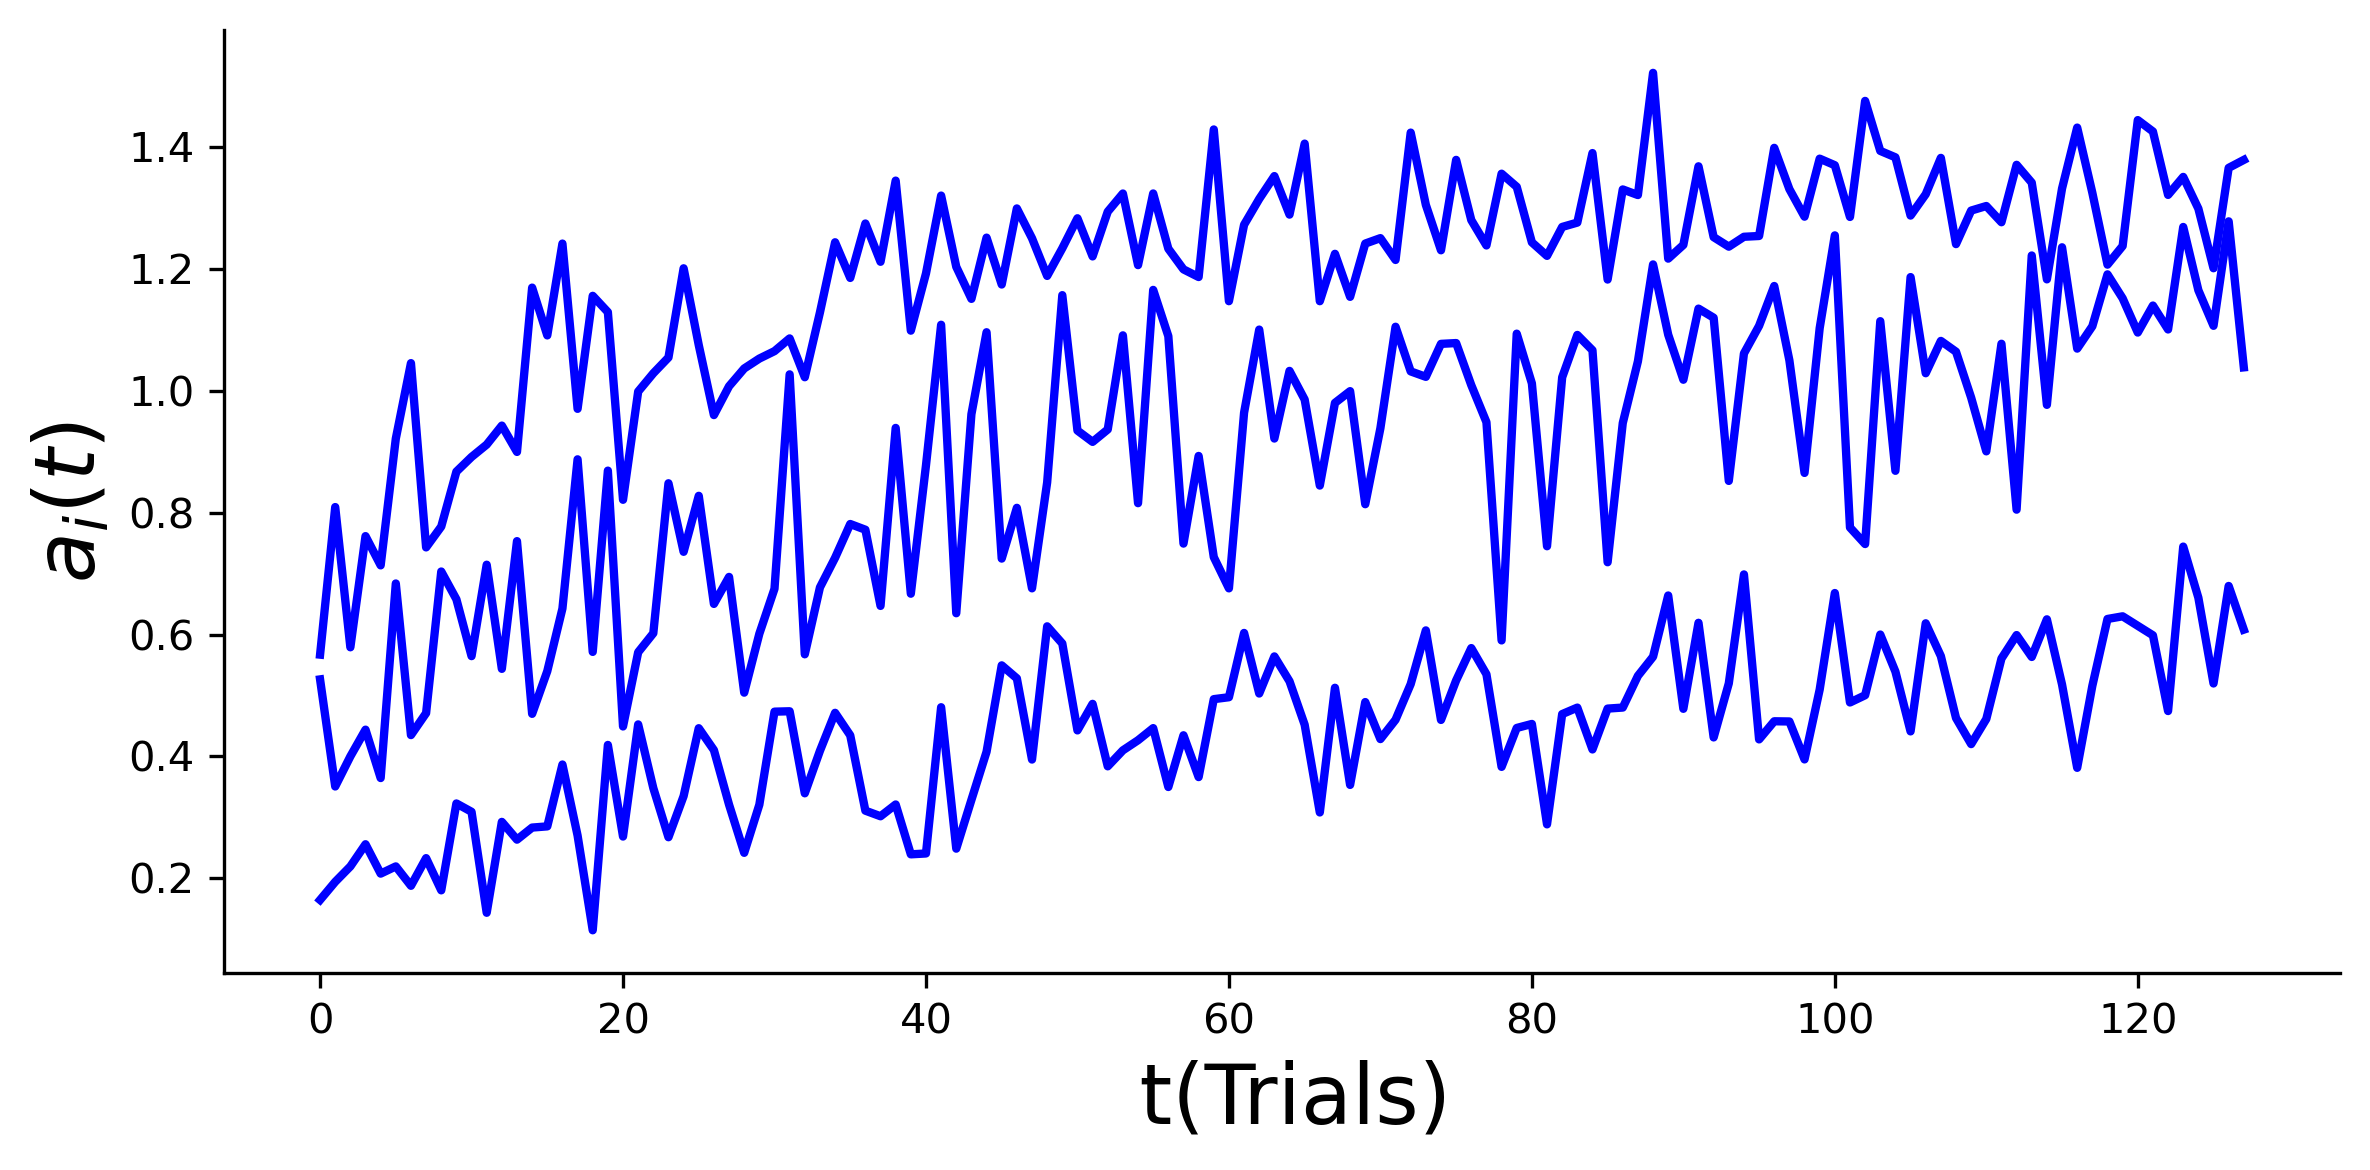

In [94]:
plot_singular_values(s, 'Trials', 'figures/singular_values_trials.svg')